#Required Modules 👼

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import re
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Load the data ⚓

---



In [ ]:
data = pd.read_excel('/content/fixlet_parsed_xml_all.xlsx', engine='openpyxl')
data

,Description,Relevances,Relevance_Count
0,Relevant computers are not currently set up to...,['(if( name of operating system starts with Wi...,6
1,Microsoft no longer provides extended securit...,['(if( name of operating system starts with Wi...,5
2,Microsoft no longer provides extended securit...,['(if( name of operating system starts with Wi...,4
3,Microsoft no longer provides extended securit...,['(if( name of operating system starts with Wi...,3
4,Microsoft no longer provides security update ...,['(if( name of operating system starts with Wi...,6
...,...,...,...
18844,The security update addresses the vulnerabilit...,['(if( name of operating system starts with Wi...,3
18845,The security update addresses the vulnerabilit...,['(if( name of operating system starts with Wi...,3
18846,Service Pack 6 for Visual Basic 6.0 provides ...,['(if( name of operating system starts with Wi...,8
18847,Note:Microsoft issued CVE-2022-30190 regardi...,['(if( name of operating system starts with Wi...,4


# PreProcess the text data 🙅

---



In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to preprocess and stem text
def preprocess_and_stem(text):
    # Remove regular expressions (regex patterns)
    text = re.sub(r'\W+', ' ', text)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove special characters and convert to lowercase
    words = [word.lower() for word in words if word.isalnum()]

    # Remove stopwords and apply stemming
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Join the stemmed words back into a sentence
    stemmed_text = " ".join(stemmed_words)

    return stemmed_text

# Apply preprocessing and stemming to the 'text' column
data['Description'] = data['Description'].apply(preprocess_and_stem)







In [ ]:
data

,Description,Relevances,Relevance_Count
0,relev comput current set show file sh file ext...,['(if( name of operating system starts with Wi...,6
1,microsoft longer provid extend secur updat sup...,['(if( name of operating system starts with Wi...,5
2,microsoft longer provid extend secur updat sup...,['(if( name of operating system starts with Wi...,4
3,microsoft longer provid extend secur updat sup...,['(if( name of operating system starts with Wi...,3
4,microsoft longer provid secur updat support of...,['(if( name of operating system starts with Wi...,6
...,...,...,...
18844,secur updat address vulner descript cvesnot se...,['(if( name of operating system starts with Wi...,3
18845,secur updat address vulner descript cvesnot se...,['(if( name of operating system starts with Wi...,3
18846,servic pack 6 visual basic 6 0 provid latest u...,['(if( name of operating system starts with Wi...,8
18847,note microsoft issu cve 2022 30190 regard micr...,['(if( name of operating system starts with Wi...,4


In [ ]:
test_data = pd.DataFrame()
test_data['description'] = data['Description']
# test_data.to_csv('test_data',index = False)
test_data

,description
0,relev comput current set show file sh file ext...
1,microsoft longer provid extend secur updat sup...
2,microsoft longer provid extend secur updat sup...
3,microsoft longer provid extend secur updat sup...
4,microsoft longer provid secur updat support of...
...,...
18844,secur updat address vulner descript cvesnot se...
18845,secur updat address vulner descript cvesnot se...
18846,servic pack 6 visual basic 6 0 provid latest u...
18847,note microsoft issu cve 2022 30190 regard micr...


In [ ]:
# test to the numerical representation
tfidf_vectorizer = TfidfVectorizer(max_features=15000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(test_data['description'])
print(tfidf_matrix)

  (0, 7892)	0.08562808557525739
  (0, 8636)	0.13663424528252766
  (0, 8195)	0.04037352855980292
  (0, 2556)	0.20340339375822325
  (0, 9028)	0.10439307829850047
  (0, 8330)	0.13304069601007926
  (0, 7944)	0.20063730246552214
  (0, 3136)	0.04415154443627482
  (0, 2940)	0.07588675973482022
  (0, 7949)	0.16570892607222332
  (0, 3066)	0.1271272791919622
  (0, 9136)	0.050316638031671385
  (0, 9027)	0.036157300880758414
  (0, 2695)	0.14723097548915687
  (0, 9069)	0.1895144362008483
  (0, 3429)	0.20340339375822325
  (0, 3295)	0.5000644587140569
  (0, 8662)	0.6102101812746697
  (0, 3330)	0.12178511007234075
  (0, 8678)	0.09562663884154159
  (0, 8654)	0.06934788915792126
  (0, 3012)	0.12467441639547809
  (0, 2909)	0.06089518759729202
  (0, 8499)	0.19378115139871865
  (1, 1801)	0.054258646663209335
  :	:
  (18848, 3273)	0.054613804897180186
  (18848, 8488)	0.258643589194467
  (18848, 3243)	0.10684792295276001
  (18848, 8879)	0.15093398961562163
  (18848, 8482)	0.13847169206007723
  (18848, 8705)	

In [ ]:
tfidf_matrix.shape

(18849, 9214)

In [ ]:
import pickle

# Save TF-IDF matrix to a file
with open('tfidf_matrix.pkl', 'wb') as file:
    pickle.dump(tfidf_matrix, file)

# t sne

---



In [ ]:
tsne_reducer = TSNE(n_components = 2)
tsne_result = tsne_reducer.fit_transform(tfidf_matrix.toarray())

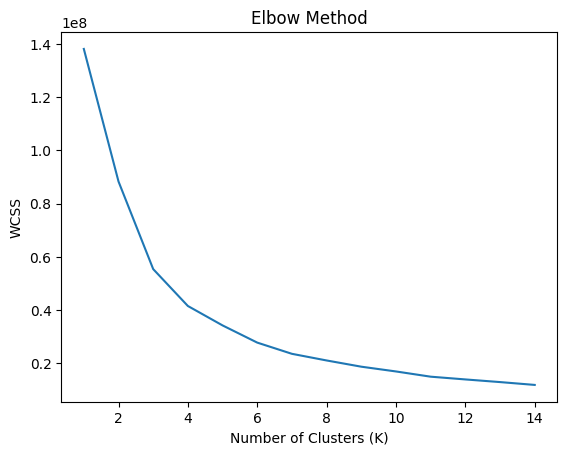

In [ ]:
# Determine the Optimal Number of Clusters (K) using the Elbow Method
wcss = []  # Within-cluster sum of squares

# Experiment with different values of K (e.g., from 1 to 10)
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tsne_result)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method curve to find the optimal K
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_k = 6 # Adjust to the value you determined
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
test_data['cluster_label'] = kmeans.fit_predict(tsne_result)

In [ ]:
test_data

,description,cluster_label
0,relev comput current set show file sh file ext...,2
1,microsoft longer provid extend secur updat sup...,2
2,microsoft longer provid extend secur updat sup...,2
3,microsoft longer provid extend secur updat sup...,2
4,microsoft longer provid secur updat support of...,2
...,...,...
18844,secur updat address vulner descript cvesnot se...,5
18845,secur updat address vulner descript cvesnot se...,5
18846,servic pack 6 visual basic 6 0 provid latest u...,3
18847,note microsoft issu cve 2022 30190 regard micr...,3


In [ ]:
# silhousette score to measure the weather the cluster are good enought with the k choosen
silhouette_avg = silhouette_score(tsne_result , test_data['cluster_label'] )
print(f'{round(silhouette_avg *100)}')

37


<ipython-input-15-367977cef8f1>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne_result[label_mask, 0], tsne_result[label_mask, 1], c=color, label=f'Group {label}')


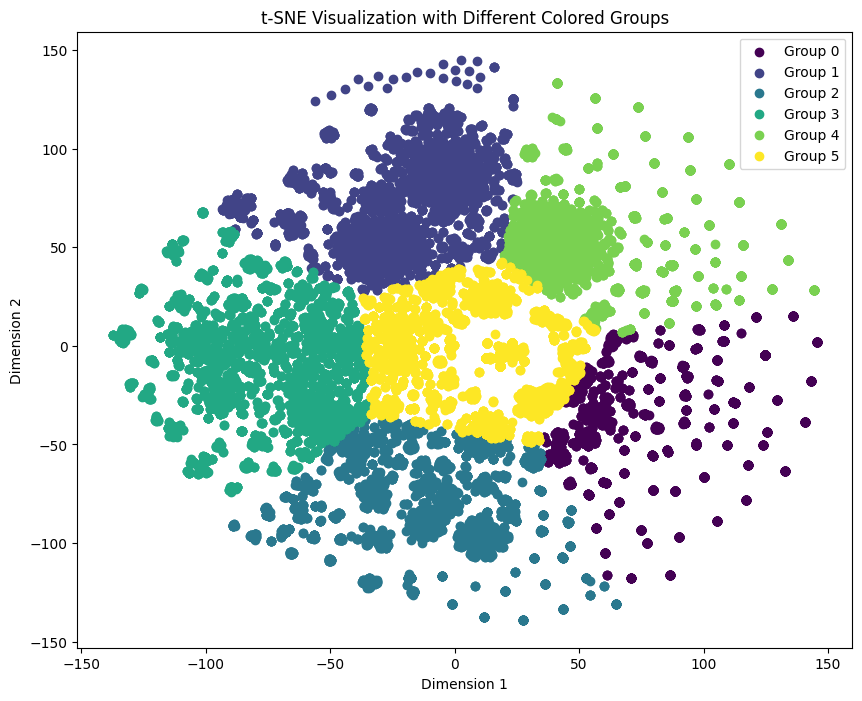

In [ ]:

# Create a scatter plot of t-SNE embeddings with different colors
plt.figure(figsize=(10, 8))  # Set the figure size

# Define a color map for different groups or labels
unique_labels = set(test_data['cluster_label'])
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot data points with different colors based on labels
for label, color in zip(unique_labels, colors):
    label_mask = (test_data['cluster_label'] == label)
    plt.scatter(tsne_result[label_mask, 0], tsne_result[label_mask, 1], c=color, label=f'Group {label}')

# Set labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()

# Set plot title
plt.title('t-SNE Visualization with Different Colored Groups')

# Show the plot
plt.show()


In [ ]:
tsne_result
df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
df_tsne

,Dimension 1,Dimension 2
0,-38.364601,-52.606010
1,-7.143628,-48.167110
2,-7.979714,-48.286285
3,-7.947008,-49.095551
4,-8.355670,-48.419247
...,...,...
18844,6.554287,-23.497501
18845,6.554287,-23.497501
18846,-61.664066,-5.455209
18847,-53.356995,-16.100636


In [ ]:
df_tsne['Cluster'] = test_data['cluster_label']
df_tsne

,Dimension 1,Dimension 2,Cluster
0,-38.364601,-52.606010,2
1,-7.143628,-48.167110,2
2,-7.979714,-48.286285,2
3,-7.947008,-49.095551,2
4,-8.355670,-48.419247,2
...,...,...,...
18844,6.554287,-23.497501,5
18845,6.554287,-23.497501,5
18846,-61.664066,-5.455209,3
18847,-53.356995,-16.100636,3


In [ ]:
centroids = kmeans.cluster_centers_
centroids.shape

(6, 2)

In [ ]:
members = df_tsne[kmeans.labels_ == 1]
members.iloc[:,0:2]

,Dimension 1,Dimension 2
211,-59.184067,79.631645
1462,-61.446037,56.952053
1463,-60.568771,57.050228
1464,-61.111042,57.639809
1465,-60.494232,57.520611
...,...,...
18804,-6.834913,98.893578
18805,-3.872761,84.874596
18806,-5.630035,85.247498
18807,0.611180,87.249557


In [ ]:
from sklearn.metrics import pairwise_distances

closest_points_per_cluster = {}

# For each cluster
for i in range(6):
    # Get members of this cluster
    members = df_tsne[kmeans.labels_ == i]

    # Calculate distances between the centroid and members
    distances = pairwise_distances(members.iloc[:,0:2], centroids[i].reshape(1, -1))

    # Find the indices of the smallest distances
    closest_point_indices = distances.argsort(axis=0)[:5].flatten()

    # Get the actual row indices in `members` for these closest points
    row_indices = members.index[closest_point_indices]
    closest_points_per_cluster[i] = members.loc[row_indices]


In [ ]:
closest_points_per_cluster

{0:       Dimension 1  Dimension 2  Cluster
 9128    82.079575   -41.513893        0
 9227    82.079575   -41.513893        0
 9228    82.079575   -41.513893        0
 9296    82.079575   -41.513893        0
 9174    82.079575   -41.513893        0,
 1:       Dimension 1  Dimension 2  Cluster
 8483   -22.371111    74.962692        1
 8484   -22.387201    74.971954        1
 8496   -22.874414    73.971542        1
 8495   -22.895578    73.979271        1
 8487   -21.748680    73.272224        1,
 2:        Dimension 1  Dimension 2  Cluster
 7845    -11.043042   -83.203781        2
 7846    -11.077394   -83.223251        2
 7364     -8.762858   -82.745819        2
 7363     -8.753876   -82.746376        2
 17050   -12.374511   -84.022697        2,
 3:       Dimension 1  Dimension 2  Cluster
 1527   -77.065788    -6.694321        3
 1531   -76.969650    -6.775728        3
 1528   -76.967056    -6.706083        3
 1532   -76.880699    -6.783964        3
 1529   -76.686012    -7.184331     

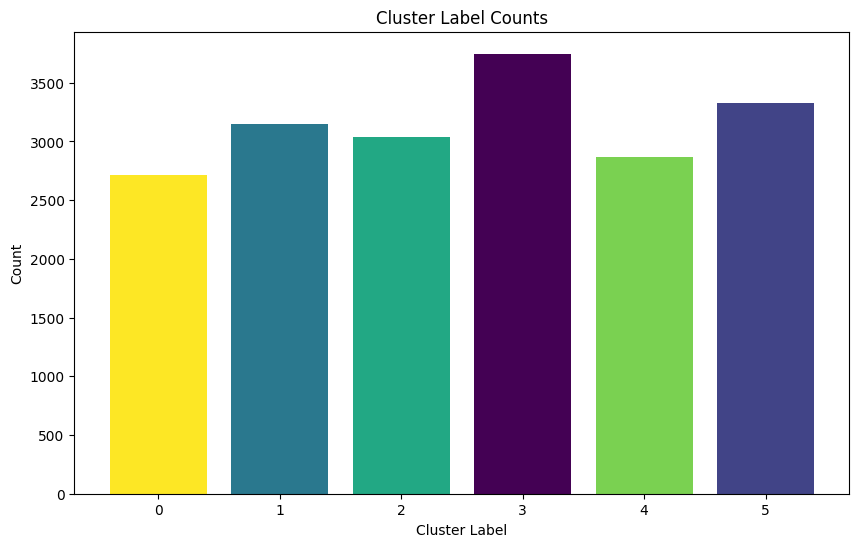

In [ ]:
# Assuming you have a DataFrame called test_data
cluster_counts = test_data["cluster_label"].value_counts()

# Extract cluster labels and their counts
cluster_labels = cluster_counts.index
counts = cluster_counts.values

# Create a colormap
cmap = plt.get_cmap("viridis")

# Create an array of colors based on the colormap
colors = cmap(np.linspace(0, 1, len(cluster_labels)))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, counts, color=colors)

# Adding labels and title
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.title("Cluster Label Counts")

# Show the plot
plt.show()


In [ ]:
test_data["cluster_label"].value_counts()

3    3747
5    3331
1    3152
2    3038
4    2867
0    2714
Name: cluster_label, dtype: int64

In [ ]:
data.drop('Relevance_Count',axis = 1,inplace = True)
data['labels'] = test_data['cluster_label']


In [ ]:
data

,Description,Relevances,labels
0,Relevant computers are not currently set up to...,['(if( name of operating system starts with Wi...,2
1,Microsoft no longer provides extended securit...,['(if( name of operating system starts with Wi...,2
2,Microsoft no longer provides extended securit...,['(if( name of operating system starts with Wi...,2
3,Microsoft no longer provides extended securit...,['(if( name of operating system starts with Wi...,2
4,Microsoft no longer provides security update ...,['(if( name of operating system starts with Wi...,2
...,...,...,...
18844,The security update addresses the vulnerabilit...,['(if( name of operating system starts with Wi...,5
18845,The security update addresses the vulnerabilit...,['(if( name of operating system starts with Wi...,5
18846,Service Pack 6 for Visual Basic 6.0 provides ...,['(if( name of operating system starts with Wi...,3
18847,Note:Microsoft issued CVE-2022-30190 regardi...,['(if( name of operating system starts with Wi...,3


# UMAP

In [ ]:
!pip uninstall umap
!pip install umap-learn

In [ ]:
!pip install pynndescent==0.5.8


In [ ]:
import umap.umap_ as umap

In [ ]:
umap_reducer = umap.UMAP(n_components=3)

# Fit UMAP to your data and obtain the lower-dimensional representation
umap_result = umap_reducer.fit_transform(tfidf_matrix.toarray())

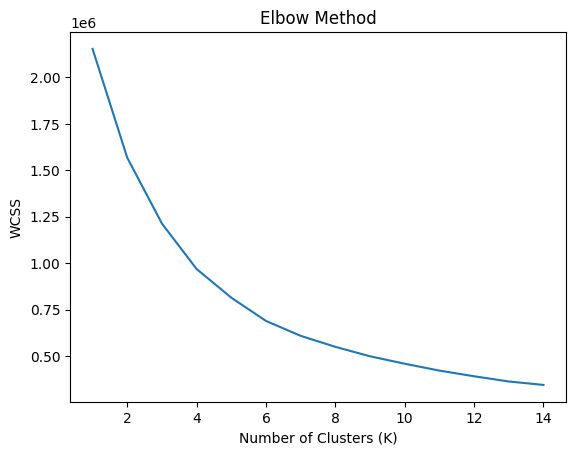

In [ ]:
# Determine the Optimal Number of Clusters (K) using the Elbow Method
wcss = []  # Within-cluster sum of squares

# Experiment with different values of K (e.g., from 1 to 10)
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(umap_result)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method curve to find the optimal K
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_k = 6 # Adjust to the value you determined
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
test_data['cluster_label'] = kmeans.fit_predict(umap_result)

In [ ]:
# silhousette score to measure the weather the cluster are good enought with the k choosen
silhouette_avg = silhouette_score(umap_result , test_data['cluster_label'] )
print(f'{round(silhouette_avg *100)}')

37


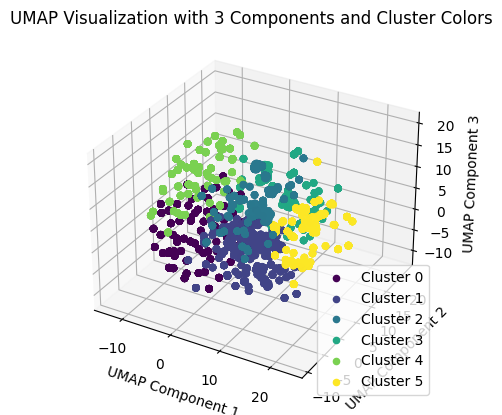

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming you have cluster_labels, a list/array of cluster labels for each data point
# Example cluster_labels = [0, 1, 0, 2, 1, ...]

# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the UMAP components (x, y, and z) from the UMAP result
umap_x = umap_result[:, 0]
umap_y = umap_result[:, 1]
umap_z = umap_result[:, 2]

# Assign a unique color to each cluster
unique_clusters = np.unique(test_data['cluster_label'])
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Plot data points with different colors for each cluster
for cluster, color in zip(unique_clusters, colors):
    cluster_mask = (np.array(test_data['cluster_label']) == cluster)
    ax.scatter(umap_x[cluster_mask], umap_y[cluster_mask], umap_z[cluster_mask], c=[color], label=f'Cluster {cluster}')

# Set labels for the axes
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')

# Set the title for the plot
plt.title('UMAP Visualization with 3 Components and Cluster Colors')

# Add a legend to distinguish clusters
ax.legend()

# Show the plot
plt.show()


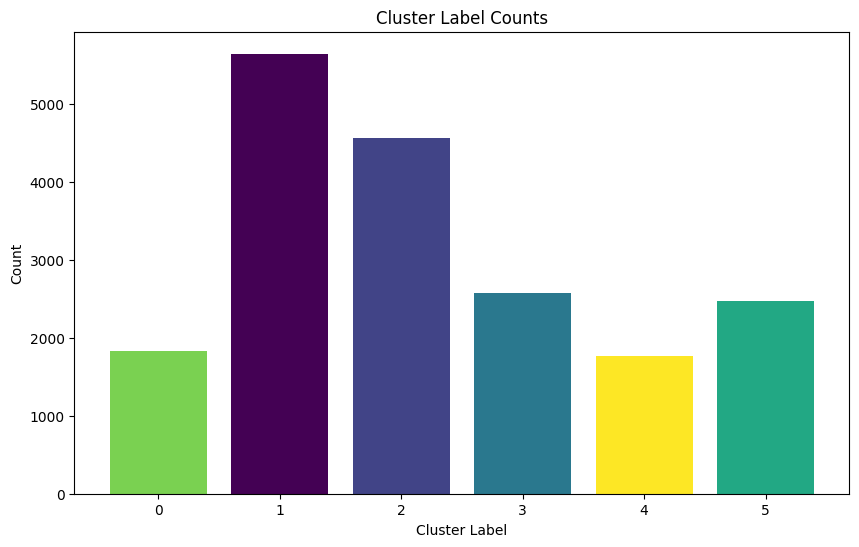

In [ ]:
# Assuming you have a DataFrame called test_data
cluster_counts = test_data["cluster_label"].value_counts()

# Extract cluster labels and their counts
cluster_labels = cluster_counts.index
counts = cluster_counts.values

# Create a colormap
cmap = plt.get_cmap("viridis")

# Create an array of colors based on the colormap
colors = cmap(np.linspace(0, 1, len(cluster_labels)))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, counts, color=colors)

# Adding labels and title
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.title("Cluster Label Counts")

# Show the plot
plt.show()


In [ ]:
test_data["cluster_label"].value_counts()

1    5646
2    4560
3    2574
5    2470
0    1830
4    1769
Name: cluster_label, dtype: int64